In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

In [40]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [83]:
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(10):
    for x in range(10):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

In [167]:
from numpy import *
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    """
    from https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [206]:
sns.set(style='whitegrid')

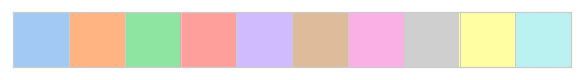

In [298]:
sns.palplot(sns.color_palette('pastel'))

In [300]:
pauto = sns.color_palette('pastel')[3]
pflex = sns.color_palette('pastel')[2]

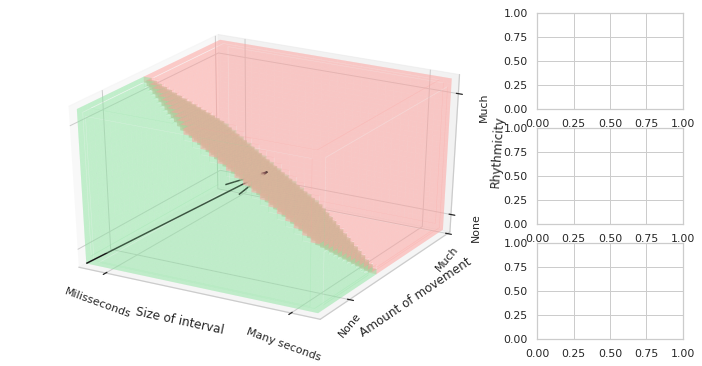

In [326]:
# fig, ax = plt.subplots(figsize=(8,6),subplot_kw={'projection':'3d'})
fig = plt.figure(figsize=(12,6))
ax=plt.subplot2grid((3,4), (0,0), 3, 3, projection='3d')

size = 30
X, Y = np.meshgrid(np.linspace(-1,1,size), np.linspace(-1,1,size))

Z = (- X + Y)
# ax.plot_surface(X, Y, Z, alpha=.5)
# cset = ax.contourf(X, Y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
# cset = ax.contourf(X, Y, Z, zdir='x', offset=-1, cmap=cm.coolwarm)
# cset = ax.contourf(X, Y, Z, zdir='y', offset=1, cmap=cm.coolwarm)

ax.set_xlabel('Size of interval')
ax.set_xlim(-1, 1); ax.set_xticks([-.8,.8])
ax.set_xticklabels(['Milisseconds','Many seconds'], rotation=-20, ha='center')

ax.set_ylabel('Amount of movement')
ax.set_ylim(-1, 1); ax.set_yticks([-.6,1])
ax.set_yticklabels(['None','Much'], rotation=50, ha='right')

ax.set_zlabel('Rhythmicity')
ax.set_zlim(-1, 1); ax.set_zticks([-.8,.8]);
ax.set_zticklabels(['None','Much'], rotation=90, ha='left')
ax.quiver(-1,-1,-1,1,1,1, arrow_length_ratio=.2, color='k')

x, y, z = np.meshgrid(np.linspace(-1,1,size), np.linspace(-1,1,size), np.linspace(-1,1,size))
auto = x+y+z< 0
ax.voxels(x, y, z, ~auto[1:,1:,1:],facecolors=[*pauto, .3], edgecolor=[.2,.2,.2,0]);
ax.voxels(x, y, z, auto[1:,1:,1:],facecolors=[*pflex, .3], edgecolor=[.2,.2,.2,0]);

ax=plt.subplot2grid((3, 4), (0,3), 1, 1)
ax=plt.subplot2grid((3, 4), (1,3), 1, 1)
ax=plt.subplot2grid((3, 4), (2,3), 1, 1)